In [2]:
#importing the necessary packages
import pandas as pd
import string
import plotly.express as px
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import matplotlib.style

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from scipy.stats import zscore
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.api as sm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.preprocessing import StandardScaler


warnings.filterwarnings("ignore")
%matplotlib inline


## 1. Cubic Zirconia Diamonds

### 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

In [71]:
df = pd.read_csv("cubic_zirconia.csv")

In [72]:
df_copy = pd.read_csv("cubic_zirconia.csv")

In [73]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [6]:
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [8]:
df.shape

(26967, 11)

In [9]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967.0,NaN,NaN,NaN,13484.0,7784.846691,1.0,6742.5,13484.0,20225.5,26967.0
carat,26967.0,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270.0,NaN,NaN,NaN,61.745147,1.41286,50.8,61.0,61.8,62.5,73.6
table,26967.0,NaN,NaN,NaN,57.45608,2.232068,49.0,56.0,57.0,59.0,79.0
x,26967.0,NaN,NaN,NaN,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,NaN,NaN,NaN,5.733569,1.166058,0.0,4.71,5.71,6.54,58.9
z,26967.0,NaN,NaN,NaN,3.538057,0.720624,0.0,2.9,3.52,4.04,31.8


In [74]:
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [75]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [76]:
df.rename(columns = {'x':'length_in_mm'}, inplace = True)
df.rename(columns = {'y':'width_in_mm'}, inplace = True)
df.rename(columns = {'z':'height_in_mm'}, inplace = True)

In [77]:
df.isnull().sum()

carat             0
cut               0
color             0
clarity           0
depth           697
table             0
length_in_mm      0
width_in_mm       0
height_in_mm      0
price             0
dtype: int64

In [78]:
print("The number of duplicates in the dataset is :",df.duplicated().sum())

The number of duplicates in the dataset is : 34


In [79]:
df.drop_duplicates(inplace = True)

In [80]:
df.duplicated().sum()

0

In [81]:
depth_median = df['depth'].median()

In [82]:
df['depth'] = df['depth'].fillna(depth_median)

In [83]:
df.isnull().sum()

carat           0
cut             0
color           0
clarity         0
depth           0
table           0
length_in_mm    0
width_in_mm     0
height_in_mm    0
price           0
dtype: int64

### Univariate Analysis

<AxesSubplot:title={'center':"'Cut' Count Plot"}, xlabel='cut', ylabel='count'>

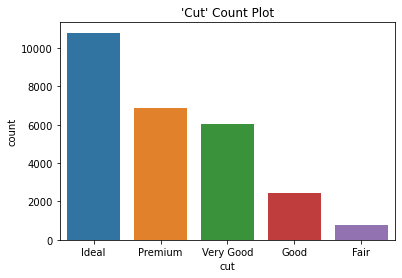

In [21]:
plt.title("'Cut' Count Plot")
sns.countplot(df['cut'])

<AxesSubplot:title={'center':"'Color' Count Plot"}, xlabel='color', ylabel='count'>

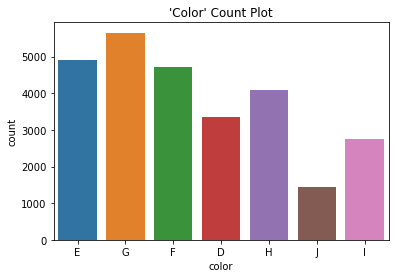

In [22]:
plt.title("'Color' Count Plot")
sns.countplot(df['color'])

<AxesSubplot:title={'center':"'Clarity' Count Plot"}, xlabel='clarity', ylabel='count'>

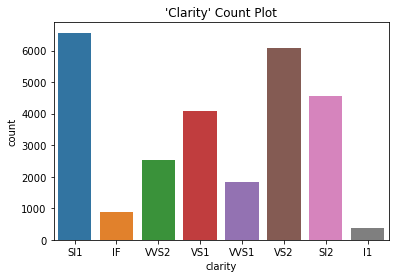

In [23]:
plt.title("'Clarity' Count Plot")
sns.countplot(df['clarity'])

In [24]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'length_in_mm',
       'width_in_mm', 'height_in_mm', 'price'],
      dtype='object')

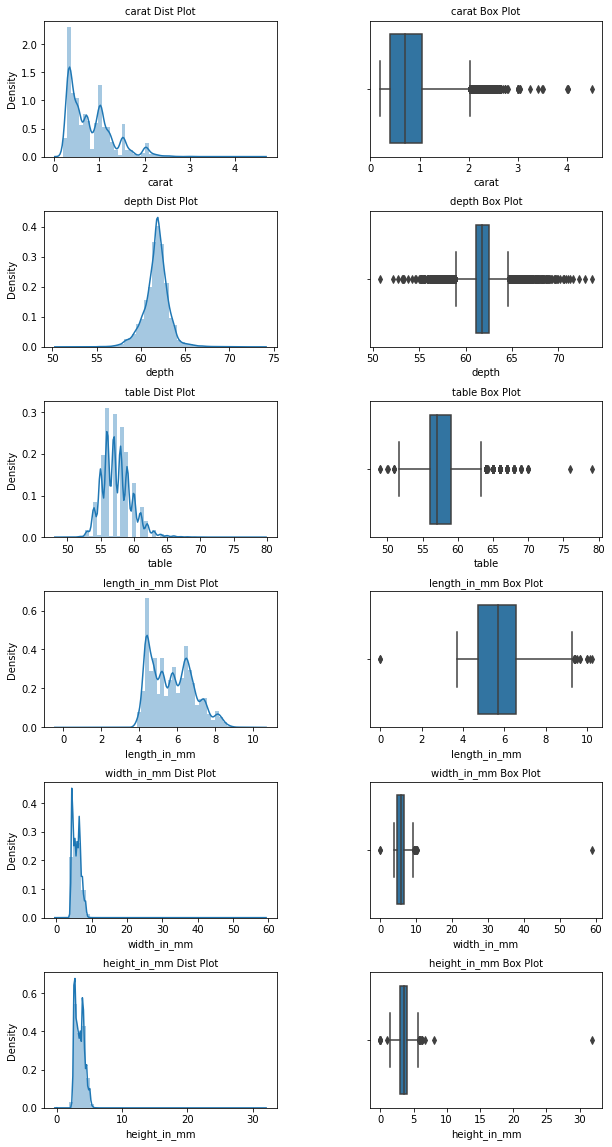

In [25]:
fig , axes= plt.subplots(nrows=6,ncols=2)
plt.subplots_adjust(wspace=0.4,
                   hspace = 0.4)
fig.set_size_inches(10, 20)

carat = sns.distplot(df['carat'],ax=axes[0][0])
carat.set_title("carat Dist Plot", fontsize = 10)
carat = sns.boxplot(df['carat'], orient = "v",ax=axes[0][1])
carat.set_title("carat Box Plot", fontsize = 10)

depth = sns.distplot(df['depth'],ax=axes[1][0])
depth.set_title("depth Dist Plot", fontsize = 10)
depth = sns.boxplot(df['depth'], orient = "v",ax=axes[1][1])
depth.set_title("depth Box Plot", fontsize = 10)

table = sns.distplot(df['table'],ax=axes[2][0])
table.set_title("table Dist Plot", fontsize = 10)
table = sns.boxplot(df['table'], orient = "v",ax=axes[2][1])
table.set_title("table Box Plot", fontsize = 10)

length_in_mm = sns.distplot(df['length_in_mm'],ax=axes[3][0])
length_in_mm.set_title("length_in_mm Dist Plot", fontsize = 10)
length_in_mm = sns.boxplot(df['length_in_mm'], orient = "v",ax=axes[3][1])
length_in_mm.set_title("length_in_mm Box Plot", fontsize = 10)

width_in_mm = sns.distplot(df['width_in_mm'],ax=axes[4][0])
width_in_mm.set_title("width_in_mm Dist Plot", fontsize = 10)
width_in_mm = sns.boxplot(df['width_in_mm'], orient = "v",ax=axes[4][1])
width_in_mm.set_title("width_in_mm Box Plot", fontsize = 10)

height_in_mm = sns.distplot(df['height_in_mm'],ax=axes[5][0])
height_in_mm.set_title("height_in_mm Dist Plot", fontsize = 10)
height_in_mm = sns.boxplot(df['height_in_mm'], orient = "v",ax=axes[5][1])
height_in_mm.set_title("height_in_mm Box Plot", fontsize = 10)

plt.show()

In [27]:
df.shape

(26925, 10)

### Bivariate Analysis

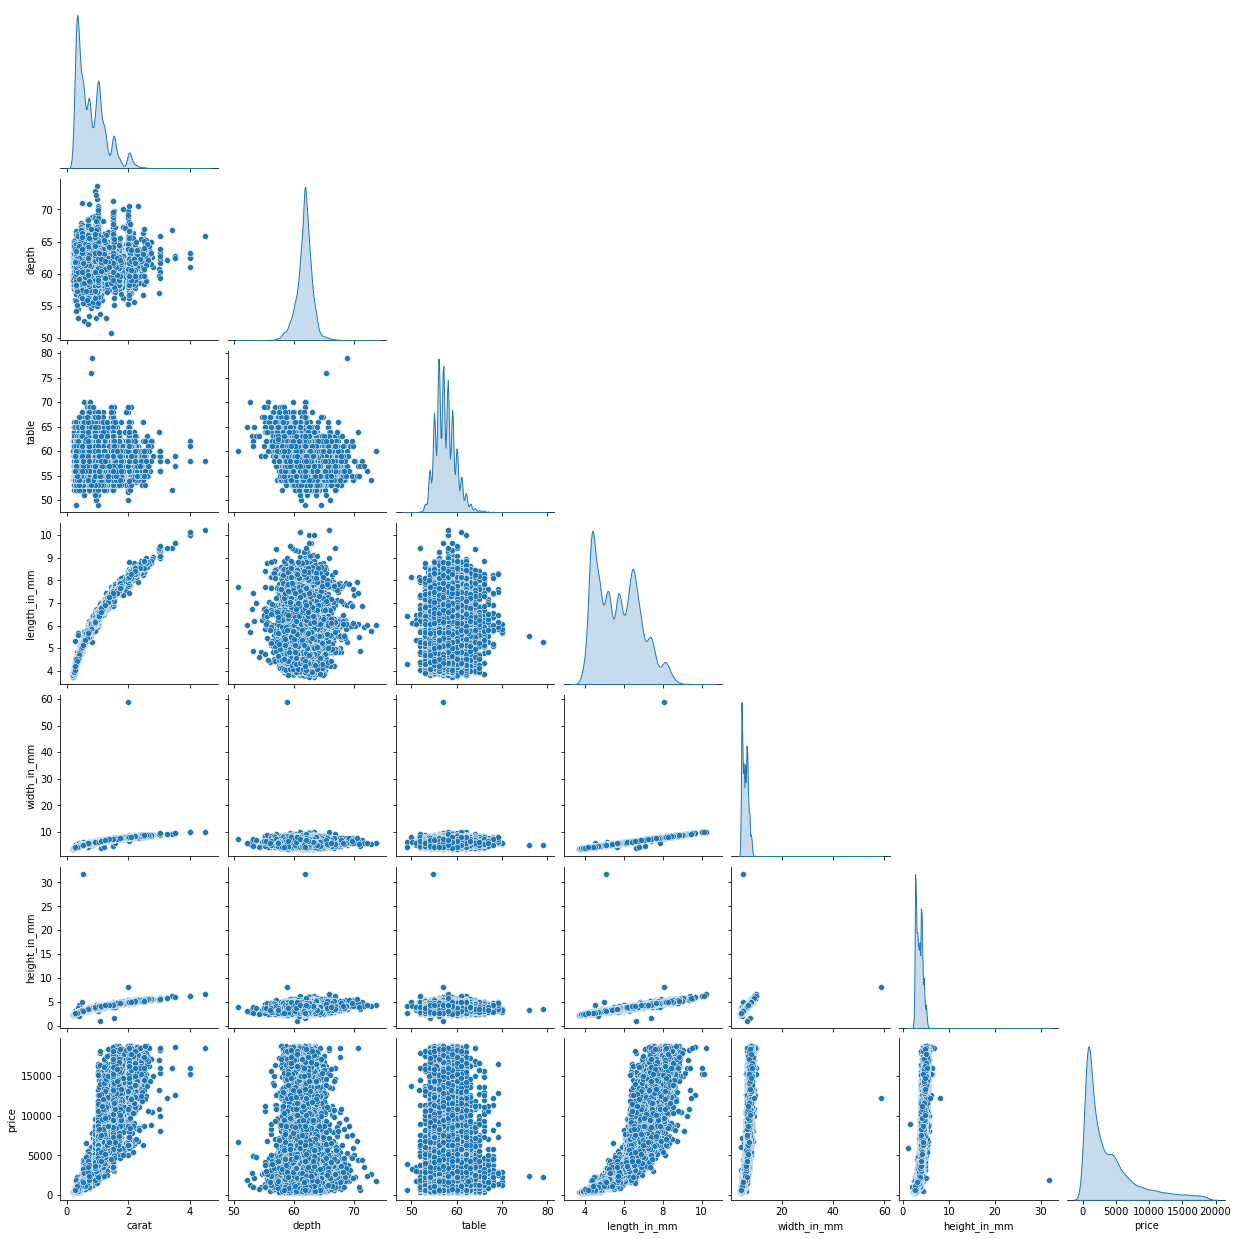

In [31]:
sns.pairplot(df, diag_kind='kde', corner = True)

### Multivariate analysis

<AxesSubplot:>

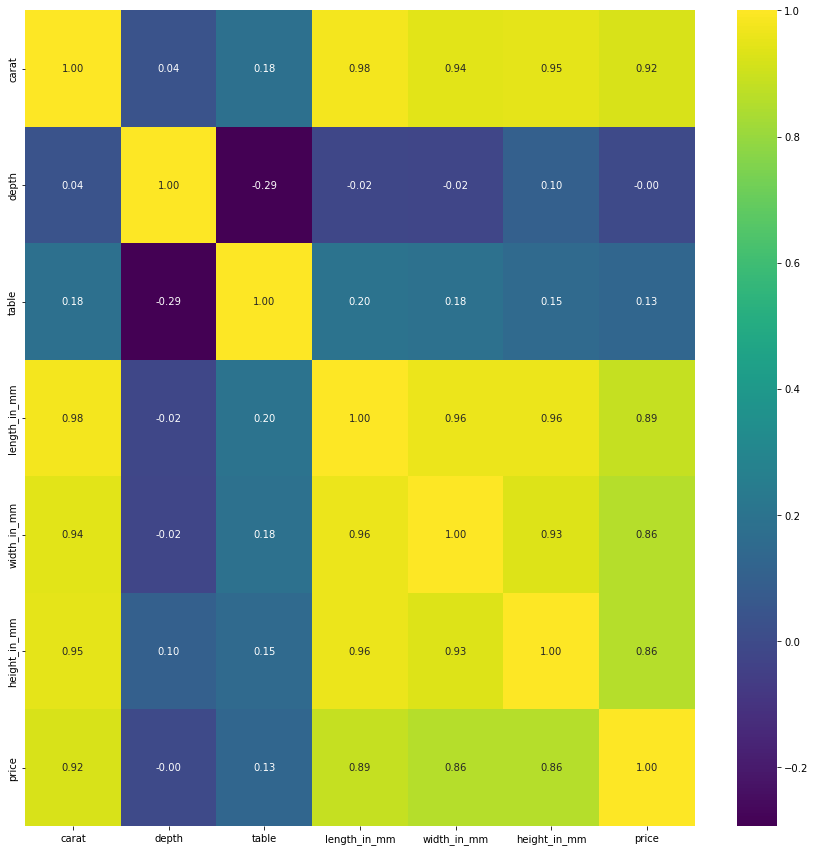

In [34]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap='viridis')

### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

In [35]:
df_copy.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [36]:
df['depth'] = df['depth'].fillna(depth_median)

In [38]:
df.isnull().sum()

carat           0
cut             0
color           0
clarity         0
depth           0
table           0
length_in_mm    0
width_in_mm     0
height_in_mm    0
price           0
dtype: int64

In [49]:
df_copy[df_copy['x']==0]

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
5821,5822,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
6215,6216,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,17507,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [84]:
df.drop(df[df['length_in_mm']==0].index, inplace=True)
df.drop(df[df['width_in_mm']==0].index, inplace=True)
df.drop(df[df['height_in_mm']==0].index, inplace=True)

In [85]:
df[df['length_in_mm']==0]

,carat,cut,color,clarity,depth,table,length_in_mm,width_in_mm,height_in_mm,price


In [132]:
# df[df['width_in_mm']==0]

df['width_in_mm'].count()

26925

In [130]:
df[df['height_in_mm']==0]

,carat,cut,color,clarity,depth,table,length_in_mm,width_in_mm,height_in_mm,price


### 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

In [86]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print(feature)
        print(df[feature].value_counts())
        print('\n')
        

cut
Ideal        10805
Premium       6880
Very Good     6027
Good          2434
Fair           779
Name: cut, dtype: int64


color
G    5650
E    4916
F    4722
H    4091
D    3341
I    2765
J    1440
Name: color, dtype: int64


clarity
SI1     6564
VS2     6092
SI2     4561
VS1     4086
VVS2    2530
VVS1    1839
IF       891
I1       362
Name: clarity, dtype: int64




##### Encoding string variables to ordinal values



In [87]:
df['cut']=np.where(df['cut'] =='Ideal', 1, df['cut'])
df['cut']=np.where(df['cut'] =='Premium', 2, df['cut'])
df['cut']=np.where(df['cut'] =='Very Good', 3, df['cut'])
df['cut']=np.where(df['cut'] =='Good', 4, df['cut'])
df['cut']=np.where(df['cut'] =='Fair', 5, df['cut'])

In [88]:
df['color']=np.where(df['color'] =='D', 1, df['color'])
df['color']=np.where(df['color'] =='E', 2, df['color'])
df['color']=np.where(df['color'] =='F', 3, df['color'])
df['color']=np.where(df['color'] =='G', 4, df['color'])
df['color']=np.where(df['color'] =='H', 5, df['color'])
df['color']=np.where(df['color'] =='I', 6, df['color'])
df['color']=np.where(df['color'] =='J', 7, df['color'])

In [89]:
df['clarity']=np.where(df['clarity'] =='SI1', 1, df['clarity'])
df['clarity']=np.where(df['clarity'] =='SI2', 2, df['clarity'])
df['clarity']=np.where(df['clarity'] =='VS1', 3, df['clarity'])
df['clarity']=np.where(df['clarity'] =='VS2', 4, df['clarity'])
df['clarity']=np.where(df['clarity'] =='VVS1', 5, df['clarity'])
df['clarity']=np.where(df['clarity'] =='VVS2', 6, df['clarity'])
df['clarity']=np.where(df['clarity'] =='IF', 7, df['clarity'])
df['clarity']=np.where(df['clarity'] =='I1', 8, df['clarity'])

In [90]:
for feature in df_copy.columns: 
    if df_copy[feature].dtype == 'object': 
        print(feature)
        print(df_copy[feature].unique())
        print('\n')
        

cut
['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']


color
['E' 'G' 'F' 'D' 'H' 'J' 'I']


clarity
['SI1' 'IF' 'VVS2' 'VS1' 'VVS1' 'VS2' 'SI2' 'I1']




In [91]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print(feature)
        print(df[feature].unique())
        print('\n')
        

cut
[1 2 3 4 5]


color
[2 4 3 1 5 7 6]


clarity
[1 7 6 3 5 4 2 8]




In [92]:
df.head()

,carat,cut,color,clarity,depth,table,length_in_mm,width_in_mm,height_in_mm,price
0,0.30,1,2,1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,2,4,7,60.8,58.0,4.42,4.46,2.70,984
2,0.90,3,2,6,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,1,3,3,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,1,3,5,60.4,59.0,4.35,4.43,2.65,779


In [98]:
# complete the if statement and convert to categorical codes
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes
       
    
    



feature: cut
[1, 2, 3, 4, 5]
Categories (5, int64): [1, 2, 3, 4, 5]
[0 1 2 3 4]


feature: color
[2, 4, 3, 1, 5, 7, 6]
Categories (7, int64): [1, 2, 3, 4, 5, 6, 7]
[1 3 2 0 4 6 5]


feature: clarity
[1, 7, 6, 3, 5, 4, 2, 8]
Categories (8, int64): [1, 2, 3, 4, 5, 6, 7, 8]
[0 6 5 2 4 3 1 7]


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26925 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         26925 non-null  float64
 1   cut           26925 non-null  int8   
 2   color         26925 non-null  int8   
 3   clarity       26925 non-null  int8   
 4   depth         26925 non-null  float64
 5   table         26925 non-null  float64
 6   length_in_mm  26925 non-null  float64
 7   width_in_mm   26925 non-null  float64
 8   height_in_mm  26925 non-null  float64
 9   price         26925 non-null  int64  
dtypes: float64(6), int64(1), int8(3)
memory usage: 1.7 MB


In [100]:
from sklearn.model_selection import train_test_split

In [101]:
y = df[['price']]
x = df.drop('price',axis=1)

In [102]:
x.head()

,carat,cut,color,clarity,depth,table,length_in_mm,width_in_mm,height_in_mm
0,0.30,0,1,0,62.1,58.0,4.27,4.29,2.66
1,0.33,1,3,6,60.8,58.0,4.42,4.46,2.70
2,0.90,2,1,5,62.2,60.0,6.04,6.12,3.78
3,0.42,0,2,2,61.6,56.0,4.82,4.80,2.96
4,0.31,0,2,4,60.4,59.0,4.35,4.43,2.65


In [103]:
y.head()

,price
0,499
1,984
2,6289
3,1082
4,779


#### Splitting into 70:30 train and test samples

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

In [107]:
x_train

,carat,cut,color,clarity,depth,table,length_in_mm,width_in_mm,height_in_mm
11944,1.03,0,3,5,61.6,57.0,6.51,6.48,4.00
2782,1.20,0,5,7,61.9,56.0,6.82,6.85,4.23
7346,0.34,0,3,3,61.0,55.0,4.56,4.58,2.79
7511,0.70,3,4,3,59.7,57.0,5.75,5.80,3.45
20965,0.54,0,3,2,61.6,56.0,5.24,5.28,3.24
...,...,...,...,...,...,...,...,...,...
13136,2.09,2,2,1,60.2,61.0,8.32,8.29,5.00
19673,0.49,1,3,0,60.6,60.0,5.10,5.06,3.08
9852,0.52,2,4,5,61.7,63.0,5.26,5.16,3.22
10808,0.56,0,6,3,62.0,56.0,5.27,5.31,3.28


##### Linear Regression with scikit learn

In [108]:
from sklearn.linear_model import LinearRegression

In [109]:
model1 = LinearRegression()
model1.fit(x_train, y_train)


LinearRegression()

In [112]:
model1.coef_

array([[11257.26665129,  -172.67744723,  -282.95512751,   187.87040674,
         -115.68922755,   -33.1871047 , -3451.78634835,  2238.51239517,
          -66.71276355]])

In [111]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, model1.coef_[0][idx]))

The coefficient for carat is 11257.266651285609
The coefficient for cut is -172.67744722603726
The coefficient for color is -282.9551275107315
The coefficient for clarity is 187.8704067418348
The coefficient for depth is -115.68922755070271
The coefficient for table is -33.1871047000557
The coefficient for length_in_mm is -3451.7863483488086
The coefficient for width_in_mm is 2238.5123951660357
The coefficient for height_in_mm is -66.71276355235663


In [113]:
model1.score(x_train, y_train)*100

88.30288145882214

In [114]:
model1.score(x_test, y_test)*100


78.35467029004063

In [115]:
ytrain_predict = model1.predict(x_train)
ytest_predict = model1.predict(x_test)

In [116]:
from sklearn.metrics import mean_squared_error, r2_score


In [117]:
round(mean_squared_error(y_test, ytest_predict),2)


3608710.0

In [118]:
r2_score(y_test, ytest_predict)


0.7835467029004063

In [119]:
print(np.sqrt(mean_squared_error(y_test, ytest_predict)))


1899.6604951635834


In [123]:
print('The co-efficients are:', model1.coef_)
print('Intercept:', model1.intercept_)
print('Mean Squared Error (MSE):', round(mean_squared_error(y_test, ytest_predict),2))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, ytest_predict)))
print('Co-efficient of Determination (r-square) on the train data:', r2_score(y_train, ytrain_predict))
print('Co-efficient of Determination (r-square) on the test data:', r2_score(y_test, ytest_predict))

The co-efficients are: [[11257.26665129  -172.67744723  -282.95512751   187.87040674
   -115.68922755   -33.1871047  -3451.78634835  2238.51239517
    -66.71276355]]
Intercept: [11696.71954656]
Mean Squared Error (MSE): 3608710.0
Root Mean Squared Error (RMSE): 1899.6604951635834
Co-efficient of Determination (r-square) on the train data: 0.8830288145882214
Co-efficient of Determination (r-square) on the test data: 0.7835467029004063


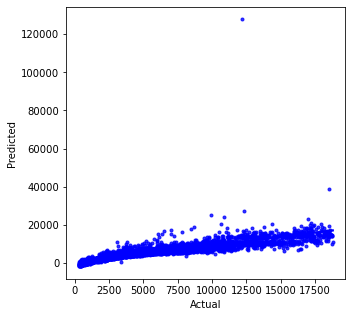

In [138]:
plt.figure(figsize=(5,5))
sns.regplot(y_test['price'], ytest_predict, color='blue', marker='.')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

##### Linear Regression using statsmodel

In [126]:
import statsmodels.formula.api as smf

In [134]:
formula = 'price ~ carat+color+clarity+depth+table+length_in_mm+width_in_mm+height_in_mm'


##### Model 2

In [135]:
model2 = smf.ols(formula=formula, data=df).fit()


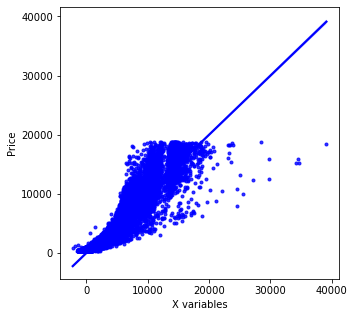

In [139]:
plt.figure(figsize=(5,5))
sns.regplot(x=model2.fittedvalues, y=y, color='blue', marker='.')
plt.xlabel('X variables')
plt.ylabel('Price')
plt.show()

In [140]:
print(model2.params)


Intercept       18724.350198
carat           11250.902589
color            -280.592768
clarity           199.666595
depth            -176.929341
table             -92.114756
length_in_mm    -1278.084281
width_in_mm        38.089868
height_in_mm      -41.968272
dtype: float64


In [141]:
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                 2.476e+04
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:16:28   Log-Likelihood:            -2.3307e+05
No. Observations:               26925   AIC:                         4.662e+05
Df Residuals:                   26916   BIC:                         4.662e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.872e+04    595.267     31.455   

#### Model 3


In [147]:
formula = 'price ~ carat+color+clarity+depth+table+length_in_mm'


In [148]:
model3 = smf.ols(formula=formula, data=df).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                 3.302e+04
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:39:24   Log-Likelihood:            -2.3308e+05
No. Observations:               26925   AIC:                         4.662e+05
Df Residuals:                   26918   BIC:                         4.662e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.891e+04    571.940     33.055   

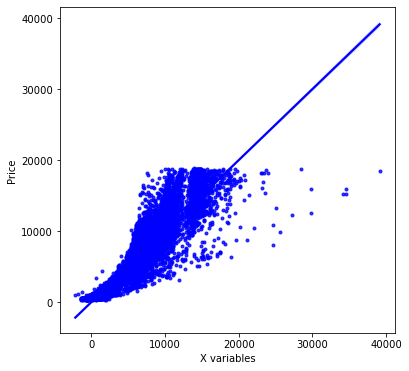

In [149]:
plt.figure(figsize=(6,6))
sns.regplot(x=model3.fittedvalues, y=y, color='blue', marker='.')
plt.xlabel('X variables')
plt.ylabel('Price')
plt.show()

In [150]:
model3.params

Intercept       18905.676305
carat           11252.885587
color            -280.566650
clarity           199.643715
depth            -179.709607
table             -92.224805
length_in_mm    -1266.752073
dtype: float64

### Model 4

In [151]:
formula = 'price ~ carat+x'


In [153]:
model4 = smf.ols(formula=formula, data=df).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                 2.229e+04
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:41:20   Log-Likelihood:            -2.3293e+05
No. Observations:               26925   AIC:                         4.659e+05
Df Residuals:                   26915   BIC:                         4.660e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.347e+04    665.327     20.242      0.0

In [154]:
model4.params

Intercept    13467.565159
carat         5614.825216
x[0]          5614.825216
x[1]          -160.001923
x[2]          -281.596021
x[3]           195.133640
x[4]          -130.062556
x[5]           -48.706494
x[6]         -1286.867777
x[7]            48.696985
x[8]           -24.366974
dtype: float64

##### Model 5

In [155]:
formula = 'price ~ carat+color+clarity+depth+table'

In [156]:
model5 = smf.ols(formula=formula, data=df).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                 3.782e+04
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:43:53   Log-Likelihood:            -2.3363e+05
No. Observations:               26925   AIC:                         4.673e+05
Df Residuals:                   26919   BIC:                         4.673e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.065e+04    526.979     20.215      0.0

In [157]:
model5.params

Intercept    10652.637685
carat         8337.882574
color         -272.877605
clarity        225.878187
depth         -126.064610
table          -93.423156
dtype: float64

##### Model 6

In [158]:
formula = 'price ~ carat+length_in_mm+width_in_mm+height_in_mm'


In [159]:
model6=smf.ols(formula=formula,data=df).fit()
print(model6.summary())
print(model6.params)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                 4.007e+04
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:46:20   Log-Likelihood:            -2.3556e+05
No. Observations:               26925   AIC:                         4.711e+05
Df Residuals:                   26920   BIC:                         4.712e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2528.8902    155.782     16.234   

##### Model 7

In [160]:
formula = 'price ~ carat+cut+color+clarity+depth+table'
model7=smf.ols(formula=formula,data=df).fit()
print(model7.summary())
print(model7.params)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                 3.193e+04
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:47:37   Log-Likelihood:            -2.3347e+05
No. Observations:               26925   AIC:                         4.670e+05
Df Residuals:                   26918   BIC:                         4.670e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5251.1611    607.762      8.640      0.0

#### Model 8

In [163]:
formula = 'price ~ carat+cut+clarity+depth'
model8=smf.ols(formula=formula,data=df).fit()
print(model8.summary())
print(model8.params)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                 4.280e+04
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:50:08   Log-Likelihood:            -2.3479e+05
No. Observations:               26925   AIC:                         4.696e+05
Df Residuals:                   26920   BIC:                         4.696e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1080.0459    408.438      2.644      0.0

##### Model 9

In [164]:
formula = 'price ~ carat+cut+color+clarity+depth+table+length_in_mm+width_in_mm+height_in_mm'
model9=smf.ols(formula=formula,data=df).fit()
print(model9.summary())
print(model9.params)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                 2.229e+04
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:50:18   Log-Likelihood:            -2.3293e+05
No. Observations:               26925   AIC:                         4.659e+05
Df Residuals:                   26915   BIC:                         4.660e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.347e+04    665.327     20.242   

### Outlier Treatment

In [165]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = np.percentile(col,[25,75])
    IQR = Q3-Q1
    lr = Q1-(1.5 * IQR)
    ur = Q3+(1.5 * IQR)
    return lr,ur

In [167]:
for column in df.columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

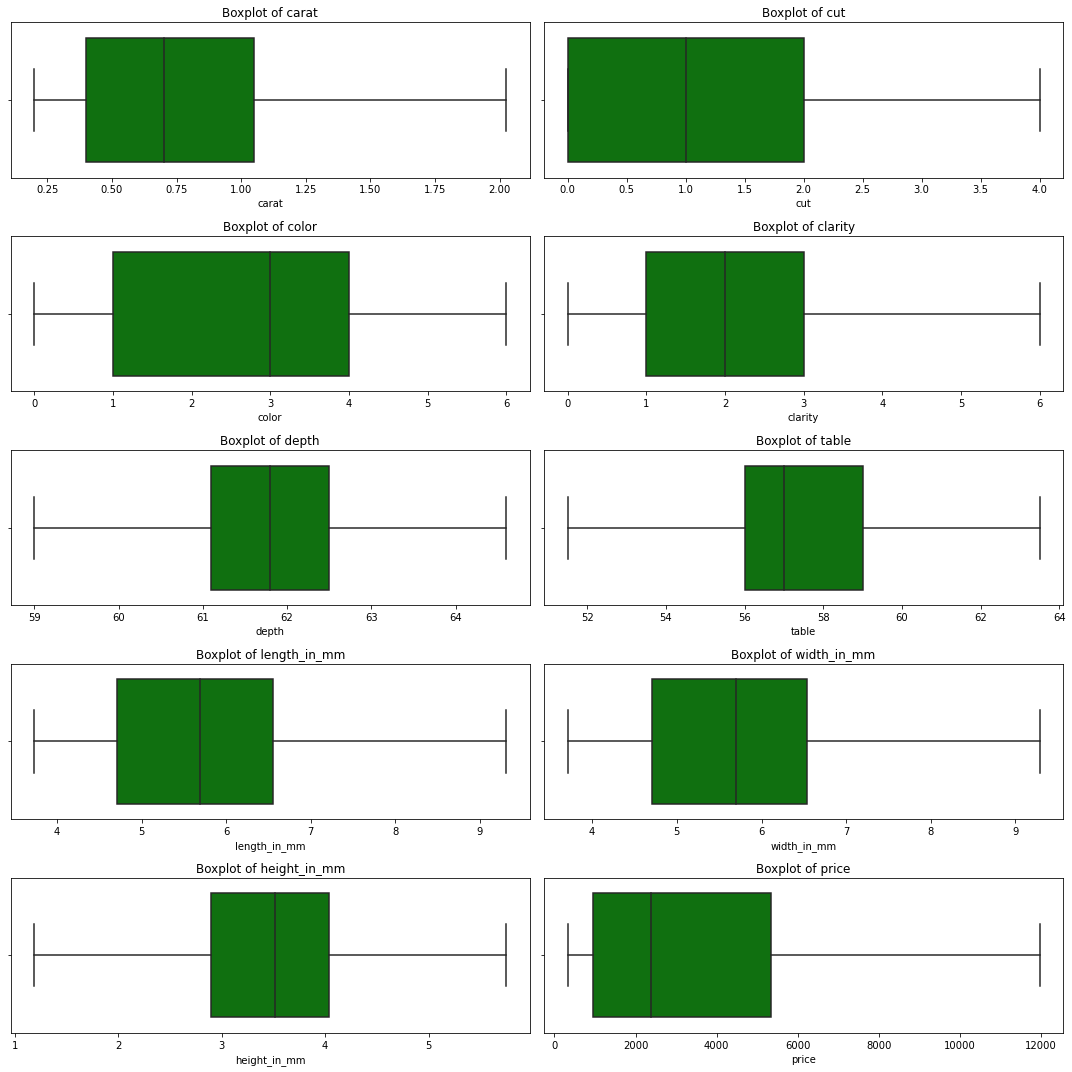

In [169]:
plt.figure(figsize = (15,15))
feature_list = df.columns
for i in range(len(feature_list)):
    plt.subplot(5,2,i+1)
    sns.boxplot(x=df[feature_list[i]], data=df, orient='h', color='g')
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [170]:
x_pt = df.drop('price', axis=1)
y_pt = df[['price']]

In [171]:
xpt_train, xpt_test, ypt_train, ypt_test = train_test_split(x_pt, y_pt, test_size=0.30, random_state=0)


##### Model10

In [172]:
model10 = LinearRegression()
model10.fit(xpt_train, ypt_train)

LinearRegression()

In [300]:
for idx, col_name in enumerate(xpt_train.columns):
    print("The coefficient for {} is {}".format(col_name, model10.coef_[0][idx]))


The coefficient for carat is -1.4754954809881397e-05
The coefficient for cut is -0.05430378306113369
The coefficient for color is 0.07596537387390198
The coefficient for clarity is -1.4285464350098698
The coefficient for depth is -0.04635929801474014
The coefficient for table is 1.6239034671206722


IndexError: index 6 is out of bounds for axis 0 with size 6

In [174]:
print(model10.intercept_)


[-1269.0545528]


In [177]:
model10.score(xpt_train, ypt_train)*100


90.77682833045904

In [178]:
model10.score(xpt_test, ypt_test)*100


90.73273586021921

In [179]:
ytest_predict = model10.predict(xpt_test)


In [182]:
print(mean_squared_error(ypt_train, ytrain_predict))


1711103.828083645


In [183]:
print(np.sqrt(mean_squared_error(ypt_train, ytrain_predict)))


1308.0916741894068


In [184]:
print(mean_squared_error(ypt_test, ytest_predict))


1147182.425938606


In [185]:
print(np.sqrt(mean_squared_error(ypt_test, ytest_predict)))


1071.066023146382


In [195]:
r2_score(ypt_train, ytrain_predict)

# r2_score(ypt_test, ytest_predict)


0.8556846097572607

In [194]:
print('The co-efficients are:', model10.coef_)
print('Intercept:', model10.intercept_)
print('Mean Squared Error (MSE):', round(mean_squared_error(ypt_test, ytest_predict),2))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(ypt_test, ytest_predict)))
print('Co-efficient of Determination (r-square) on the train data:', r2_score(ypt_train, ytrain_predict))
print('Co-efficient of Determination (r-square) on the test data:', r2_score(ypt_test, ytest_predict))

The co-efficients are: [[ 9163.81699967  -146.21521536  -239.04012231   206.22338885
     49.8729335    -21.08320301 -1933.08117053  2328.17811544
  -1716.86010572]]
Intercept: [-1269.0545528]
Mean Squared Error (MSE): 1147182.43
Root Mean Squared Error (RMSE): 1071.066023146382
Co-efficient of Determination (r-square) on the train data: 0.8556846097572607
Co-efficient of Determination (r-square) on the test data: 0.907327358602192


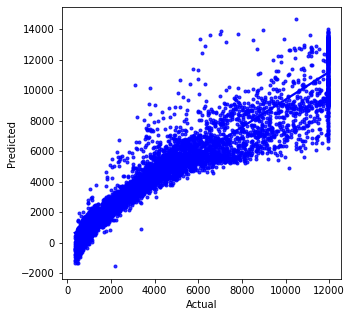

In [192]:
plt.figure(figsize=(5,5))
sns.regplot(ypt_test['price'], ytest_predict, color='blue', marker='.')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

#### Model11

In [189]:
formula = 'price ~ carat+cut+color+clarity+depth+table+length_in_mm+width_in_mm+height_in_mm'
model11=smf.ols(formula=formula,data=df).fit()
print(model11.summary())
print(model11.params)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 2.940e+04
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:00:28   Log-Likelihood:            -2.2559e+05
No. Observations:               26925   AIC:                         4.512e+05
Df Residuals:                   26915   BIC:                         4.513e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -373.2624    784.243     -0.476   

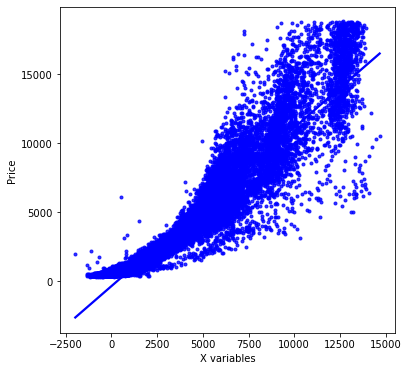

In [193]:
plt.figure(figsize=(6,6))
sns.regplot(x=model11.fittedvalues, y=y, color='blue', marker='.')
plt.xlabel('X variables')
plt.ylabel('Price')
plt.show()

### Checking multi-collinearity with Variance Inflation Formula

In [199]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(xpt_train.values, i) for i in range(xpt_train.shape[1])],
    index=xpt_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

carat             123.079812
cut                 2.628435
color               3.667409
clarity             2.690510
depth            1154.482866
table             903.711090
length_in_mm    10517.736241
width_in_mm      9097.920108
height_in_mm     3403.947489
dtype: float64



## 2. Holiday Package

### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [200]:
df2 = pd.read_csv("Holiday_Package.csv")

In [201]:
df2_copy = pd.read_csv("Holiday_Package.csv")

In [202]:
df2.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [203]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [204]:
df2.shape

(872, 8)

In [205]:
df2.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [213]:
df2.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,872.0,NaN,NaN,NaN,436.5,251.869014,1.0,218.75,436.5,654.25,872.0
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872.0,NaN,NaN,NaN,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,NaN,NaN,NaN,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,NaN,NaN,NaN,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,NaN,NaN,NaN,0.311927,0.61287,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,NaN,NaN,NaN,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [211]:
print("Number of duplicates:",df2.duplicated().sum())

Number of duplicates: 0


In [214]:
df2.drop('Unnamed: 0', axis=1, inplace=True)

In [215]:
df2.columns

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

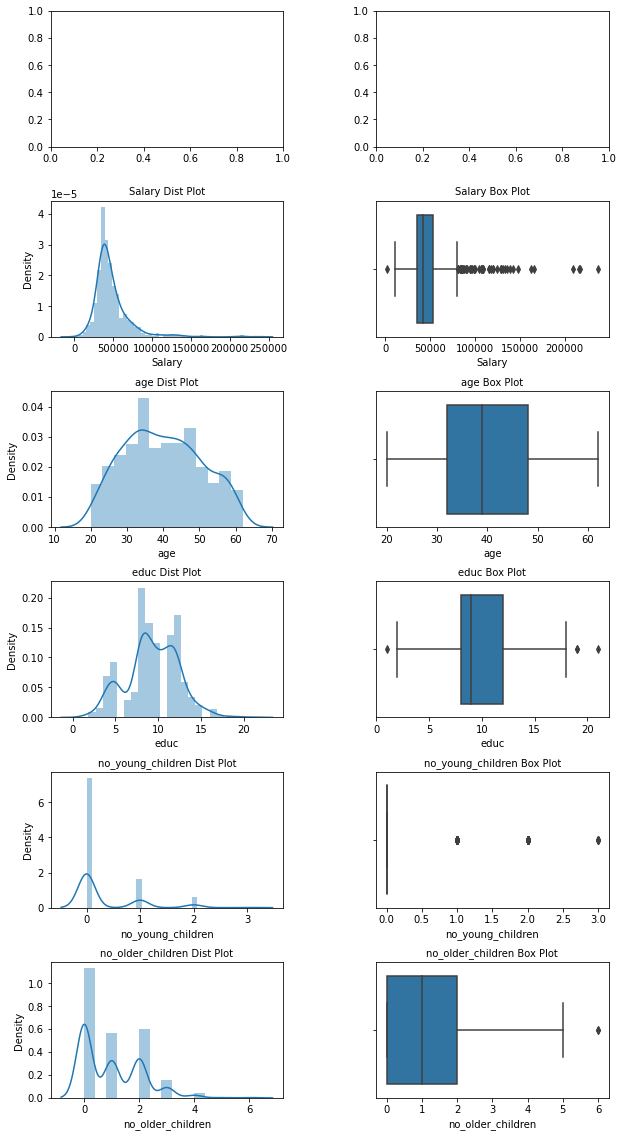

In [225]:
fig , axes= plt.subplots(nrows=6,ncols=2)
plt.subplots_adjust(wspace=0.4,
                   hspace = 0.4)
fig.set_size_inches(10, 20)

Salary = sns.distplot(df2['Salary'],ax=axes[1][0])
Salary.set_title("Salary Dist Plot", fontsize = 10)
Salary = sns.boxplot(df2['Salary'], orient = "v",ax=axes[1][1])
Salary.set_title("Salary Box Plot", fontsize = 10)

age = sns.distplot(df2['age'],ax=axes[2][0])
age.set_title("age Dist Plot", fontsize = 10)
age = sns.boxplot(df2['age'], orient = "v",ax=axes[2][1])
age.set_title("age Box Plot", fontsize = 10)

educ = sns.distplot(df2['educ'],ax=axes[3][0])
educ.set_title("educ Dist Plot", fontsize = 10)
educ = sns.boxplot(df2['educ'], orient = "v",ax=axes[3][1])
educ.set_title("educ Box Plot", fontsize = 10)

no_young_children = sns.distplot(df2['no_young_children'],ax=axes[4][0])
no_young_children.set_title("no_young_children Dist Plot", fontsize = 10)
no_young_children = sns.boxplot(df2['no_young_children'], orient = "v",ax=axes[4][1])
no_young_children.set_title("no_young_children Box Plot", fontsize = 10)

no_older_children = sns.distplot(df2['no_older_children'],ax=axes[5][0])
no_older_children.set_title("no_older_children Dist Plot", fontsize = 10)
no_older_children = sns.boxplot(df2['no_older_children'], orient = "v",ax=axes[5][1])
no_older_children.set_title("no_older_children Box Plot", fontsize = 10)

plt.show()

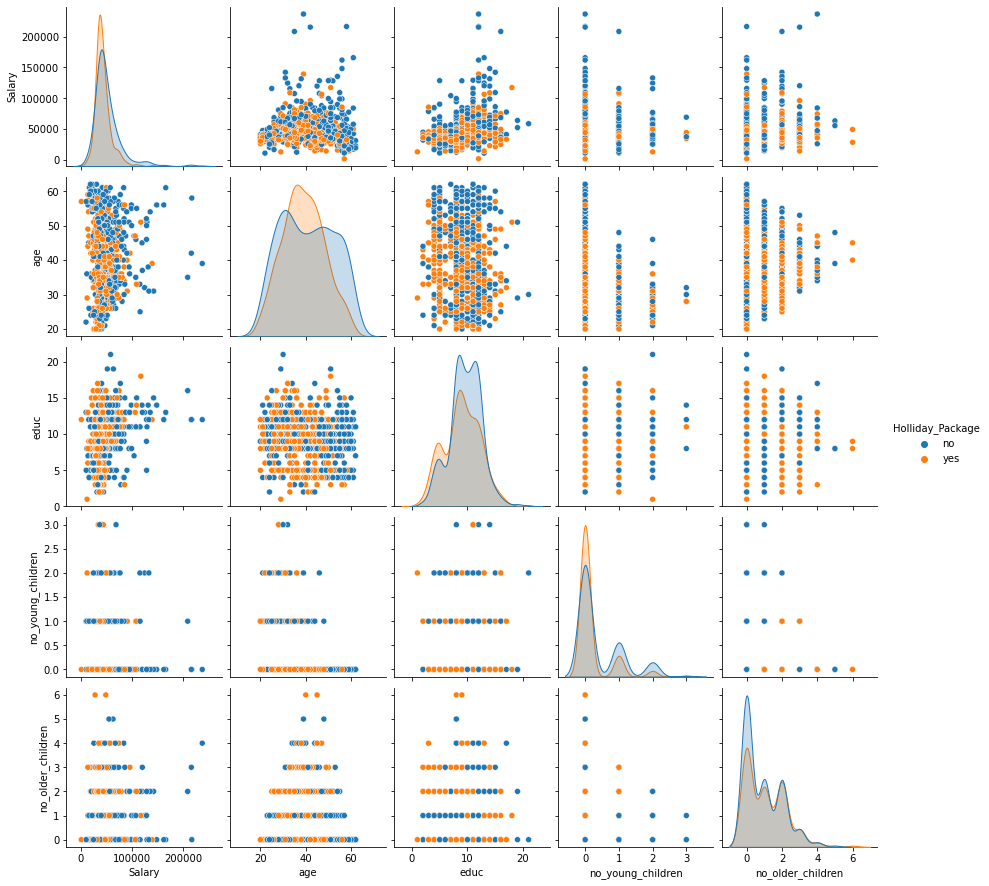

In [229]:
sns.pairplot(data=df2, hue='Holliday_Package')

<AxesSubplot:>

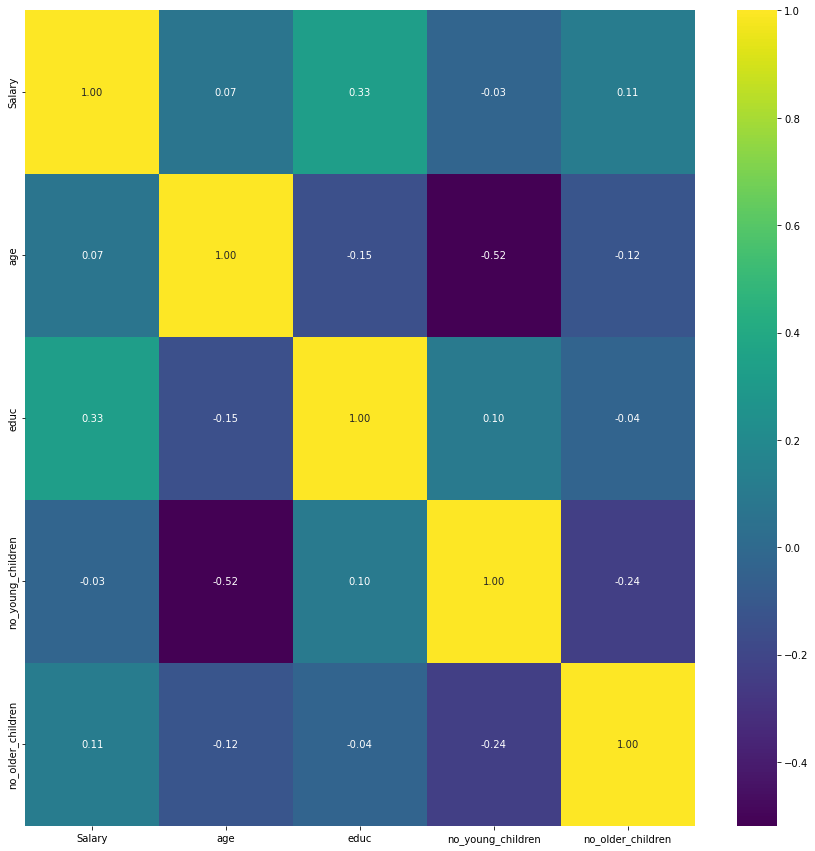

In [232]:
plt.figure(figsize=(15,15))
sns.heatmap(df2.corr(),annot=True,fmt=".2f",cmap='viridis')

### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).


In [234]:
df2.Holliday_Package.replace(['yes','no'],[1,0],inplace=True)

In [236]:
df2.foreign.replace(['yes','no'],[1,0],inplace=True)

In [237]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Holliday_Package   872 non-null    int64
 1   Salary             872 non-null    int64
 2   age                872 non-null    int64
 3   educ               872 non-null    int64
 4   no_young_children  872 non-null    int64
 5   no_older_children  872 non-null    int64
 6   foreign            872 non-null    int64
dtypes: int64(7)
memory usage: 47.8 KB


In [238]:
df2.foreign.value_counts()

0    656
1    216
Name: foreign, dtype: int64

In [239]:
df2.Holliday_Package.value_counts()

0    471
1    401
Name: Holliday_Package, dtype: int64

#### Train Test Split

In [241]:
X = df2.drop(['Holliday_Package'], axis=1)

y = df2[['Holliday_Package']]

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [244]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)
print (df2.shape)

(610, 6)
(262, 6)
(610, 1)
(262, 1)
(872, 7)


### Logistic Regression

In [246]:
from sklearn.linear_model import LogisticRegression

In [302]:
# Fit the Logistic Regression model using solver newton-cg
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.5s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [303]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[0][idx]))
# clf.coef_


The coefficient for Salary is -1.749001897075807e-05
The coefficient for age is -0.054807870552790135
The coefficient for educ is 0.0781270667793458
The coefficient for no_young_children is -1.5489852417257366
The coefficient for no_older_children is -0.05724887090716496
The coefficient for foreign is 1.587936588582022


In [255]:
# Predicting on train and test set
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [256]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.760399,0.239601
1,0.273260,0.726740
2,0.902626,0.097374
3,0.978137,0.021863
4,0.513209,0.486791


In [257]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.6786885245901639

In [259]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

AUC: 0.743


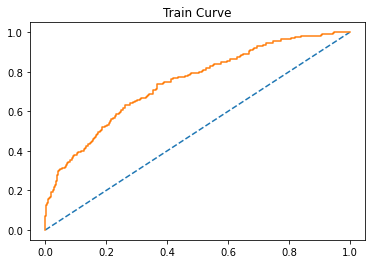

In [270]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('Train Curve')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [267]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.6374045801526718

AUC: 0.743


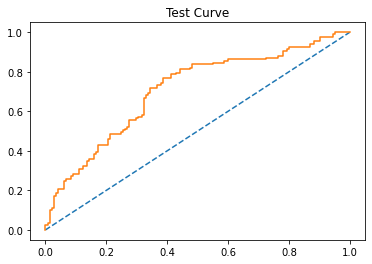

In [269]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('Test Curve')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [261]:
confusion_matrix(y_train, ytrain_predict)

array([[252,  74],
       [122, 162]], dtype=int64)

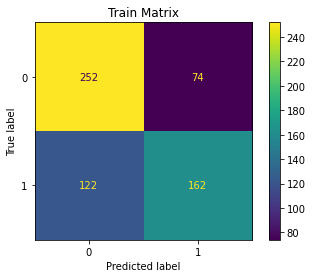

In [272]:
plot_confusion_matrix(model,X_train,y_train)
plt.title('Train Matrix');

In [263]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.69      0.57      0.62       284

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.67       610



In [264]:
confusion_matrix(y_test, ytest_predict)

array([[102,  43],
       [ 52,  65]], dtype=int64)

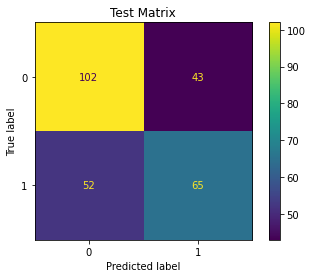

In [271]:
plot_confusion_matrix(model,X_test,y_test)
plt.title('Test Matrix');

In [266]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68       145
           1       0.60      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.63      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262



In [274]:
# Fit the Logistic Regression model using solver ”lbfgs”
model = LogisticRegression(solver='lbfgs',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.1s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', verbose=True)

In [275]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [276]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.628400,0.371600
1,0.517954,0.482046
2,0.559374,0.440626
3,0.728629,0.271371
4,0.504930,0.495070


In [277]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.519672131147541

AUC: 0.567


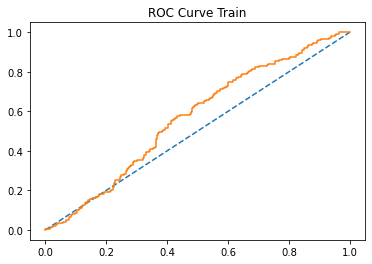

In [288]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC Curve Train')
plt.plot(train_fpr, train_tpr);

AUC: 0.567


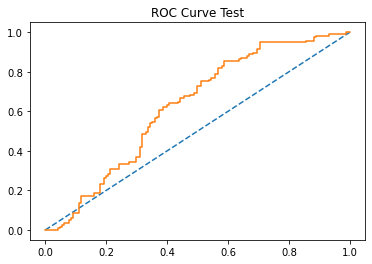

In [289]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC Curve Test')
plt.plot(test_fpr, test_tpr);

In [280]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.5305343511450382

In [281]:
confusion_matrix(y_train, ytrain_predict)

array([[294,  32],
       [261,  23]], dtype=int64)

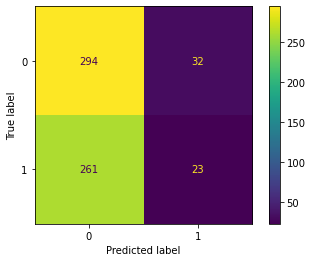

In [282]:
plot_confusion_matrix(model,X_train,y_train);

In [283]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.53      0.90      0.67       326
           1       0.42      0.08      0.14       284

    accuracy                           0.52       610
   macro avg       0.47      0.49      0.40       610
weighted avg       0.48      0.52      0.42       610



In [284]:
confusion_matrix(y_test, ytest_predict)

array([[129,  16],
       [107,  10]], dtype=int64)

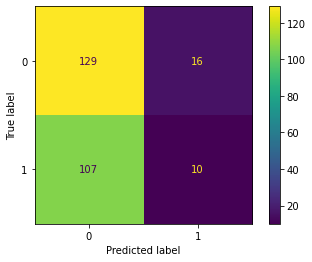

In [285]:
plot_confusion_matrix(model,X_test,y_test);

In [286]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.55      0.89      0.68       145
           1       0.38      0.09      0.14       117

    accuracy                           0.53       262
   macro avg       0.47      0.49      0.41       262
weighted avg       0.47      0.53      0.44       262



### Linear Discriminant Analysis

In [291]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [293]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

In [301]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, clf.coef_[0][idx]))


The coefficient for Salary is -1.4754954809881397e-05
The coefficient for age is -0.05430378306113369
The coefficient for educ is 0.07596537387390198
The coefficient for no_young_children is -1.4285464350098698
The coefficient for no_older_children is -0.04635929801474014
The coefficient for foreign is 1.6239034671206722


In [304]:
pred_class_train = model.predict(X_train)


pred_class_test = model.predict(X_test)

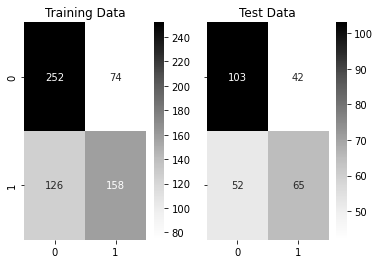

In [295]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


In [306]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.69      0.57      0.62       284

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.67       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.66      0.70      0.68       145
           1       0.60      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.63      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262
 



In [307]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [308]:
pred_prob_train[:,1]

array([0.25806063, 0.73323786, 0.01958746, 0.33231403, 0.56426115,
       0.78162592, 0.42154781, 0.28578   , 0.21729864, 0.28959455,
       0.29148014, 0.25626151, 0.37753215, 0.49338228, 0.4218704 ,
       0.76602929, 0.77328031, 0.11659508, 0.4472541 , 0.89143751,
       0.71941398, 0.15885358, 0.20280766, 0.64223337, 0.25795478,
       0.30527663, 0.66174796, 0.34575945, 0.85321561, 0.30633938,
       0.69183792, 0.79942582, 0.52464115, 0.26253465, 0.34176472,
       0.56323963, 0.5394575 , 0.33324478, 0.43476373, 0.04582515,
       0.29815046, 0.5547532 , 0.3130367 , 0.882918  , 0.06308533,
       0.76138058, 0.67695006, 0.10197694, 0.05634133, 0.56919318,
       0.49163347, 0.21886906, 0.67522346, 0.45342003, 0.8947331 ,
       0.46580696, 0.66421795, 0.25935485, 0.66177989, 0.36376252,
       0.35908192, 0.24538811, 0.16948387, 0.08750429, 0.3258492 ,
       0.37101566, 0.5528738 , 0.57204172, 0.04941439, 0.60136366,
       0.63534201, 0.24728915, 0.39388429, 0.79199531, 0.38972

AUC for the Training Data: 0.743
AUC for the Test Data: 0.705


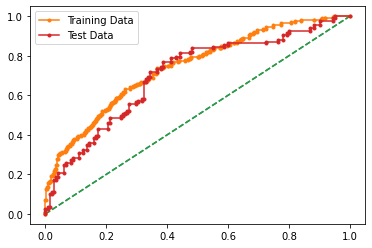

In [310]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()